# MRCNN Inference Demo


**Prerequisite: Please see this document first:** [Here](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/README.md)

### Import all python dependencies for MRCNN inference.

In [1]:
%%capture
import sys,glob,warnings,os
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
from skimage.util import img_as_ubyte
from skimage.color import label2rgb

### Import MRCNN inference python modules. Main source code is located [Here](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/mrcnn/src/mrcnn_infer.py) 

In [2]:
%%capture
sys.path.insert(1, '../src');
sys.path.insert(1,'../../../visualization')
from mrcnn_infer import *
from download_util import *

### Download pretrained MRCNN model weight.

We'll be using a model trained on the COCO dataset.

In [3]:
%%capture
MRCNN_MODEL_URL = 'https://ndownloader.figshare.com/files/22280580?private_link=dd27a1ea28ce434aa7d4'
MRCNN_MODEL_PATH = 'MRCNN_pretrained.zip'
download_and_unzip_datasets(MRCNN_MODEL_URL, MRCNN_MODEL_PATH)
mrcnn_model_path = "./mrcnn_pretrained.h5"

### Setup configuration file path. 

The configurations of this inference demo are in **[demo.ini](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/mrcnn/demo/demo.ini)**. For your own implementations, please modify the configurations a bit to fit your task. 

In [4]:
config_file_path = "./demo.ini"
with open(config_file_path, 'r') as fin:
    print(fin.read())

[general]
cropsize = 256
padding = 50
threshold = 10



### Read sample cell images.

3 Different cell images are used in this demo.

In [5]:
image_list =['../../../visualization/GreyScale/BABE_Biological/Plate1_E03_T0001FF001Zall.tif',
             '../../../visualization/GreyScale/HiTIF_Laurent_Technical/AUTO0496_J14_T0001F001L01A01Z01C01.tif',
             '../../../visualization/GreyScale/Manasi_Technical/Plate1_M21_T0001F003L01A01Z01C01.tif'
]

img = np.zeros((len(image_list),1078,1278))
for i in range(len(image_list)):
    image_resized = img_as_ubyte(resize(np.array(Image.open(image_list[i])), (1078, 1278)))
    img[i,:,:] = image_resized

### Visualize sample input images.

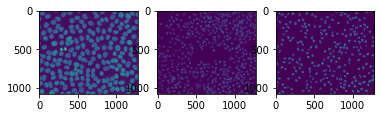

In [6]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(img[0])
axarr[1].imshow(img[1])
axarr[2].imshow(img[2])
plt.rcParams['figure.figsize'] = [15, 15]

### Run Instance Segmentation. 

Following is the syntax of mrcnn_infer.

**mrcnn_infer(img, mrcnn_model_path, config_file_path)**

- img: source input image (numpy format). The dimension of this array is (N x height x width). (N: the number of images)
- mrcnn_model_path: pre-trained MRCNN model file path. (e.g., mrcnn_pretrained.h5)
- config_file_path: configuration file path. (e.g., demo.ini)

In [7]:
%%capture
mask = mrcnn_infer(img, mrcnn_model_path, config_file_path)

### Visualize Output images.

In [8]:
print(mask.shape)

(3, 1078, 1278)


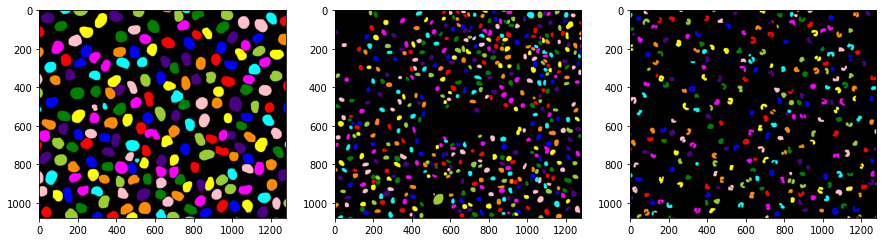

In [9]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(label2rgb(mask[0],bg_color=(0, 0, 0),bg_label=0))
axarr[1].imshow(label2rgb(mask[1],bg_color=(0, 0, 0),bg_label=0))
axarr[2].imshow(label2rgb(mask[2],bg_color=(0, 0, 0),bg_label=0))
plt.rcParams['figure.figsize'] = [15, 15]